Cuaderno # 1 - Regresión linear con una característica
AREP - TDSE 2026-1

In [1]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Dataset real
x = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
y = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

m = len(x)  # Número de ejemplos (10 en este caso)

print(f"Number of examples m = {m}")
print(f"x values (M): {x}")
print(f"y values (L): {y}")

Number of examples m = 10
x values (M): [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
y values (L): [0.15, 0.35, 1.0, 2.3, 4.1, 7.0, 11.2, 17.5, 25.0, 35.0]


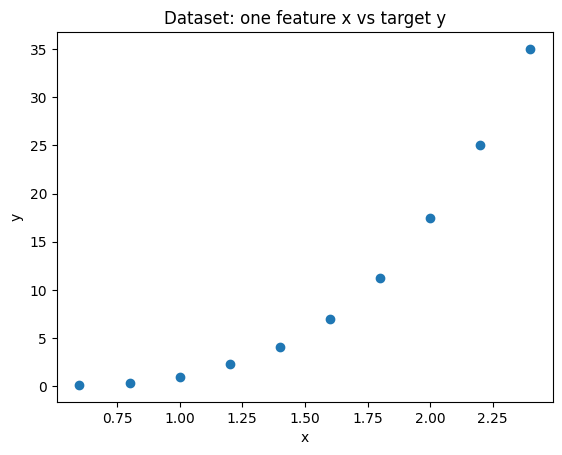

In [21]:
plt.figure()
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset: one feature x vs target y")
plt.show()


In [22]:
def predict(x_list, w, b):
    """Compute predicted y values for a list of x, using f_{w,b}(x) = w x + b."""
    y_hat_list = []
    for i in range(len(x_list)):
        y_hat_list.append(w * x_list[i] + b)
    return y_hat_list

w_test = 0.0
b_test = 0.0
y_hat_test = predict(x, w_test, b_test)
print("First 5 predictions with w=0, b=0:", y_hat_test[:5])

First 5 predictions with w=0, b=0: [0.0, 0.0, 0.0, 0.0, 0.0]


In [23]:
def compute_cost(x_list, y_list, w, b):
    """Compute the cost J(w,b) using explicit loops."""
    m_local = len(x_list)
    total = 0.0
    for i in range(m_local):
        f_wb = w * x_list[i] + b
        diff = f_wb - y_list[i]
        total += diff * diff
    cost = total / (2 * m_local)
    return cost

print("Cost with w=0, b=0:", compute_cost(x, y, w_test, b_test))

Cost with w=0, b=0: 117.69675


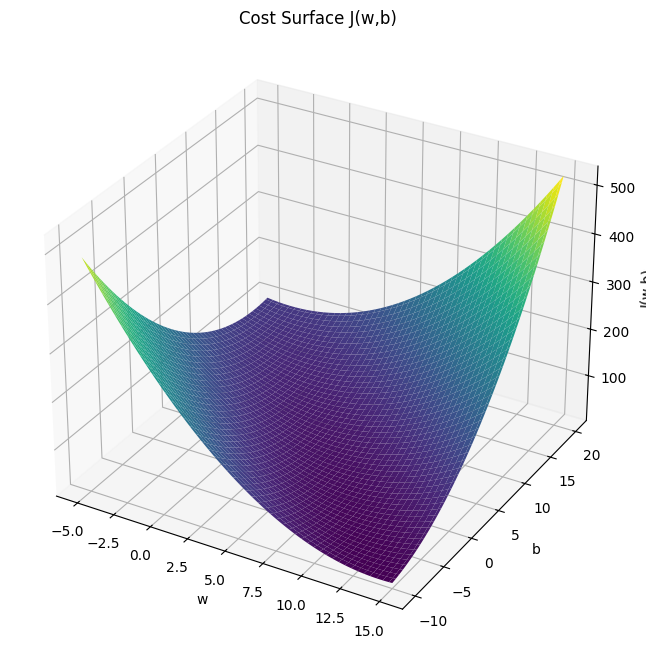

In [25]:

# Cost Surface Visualization (3D)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Definir rango de valores para w y b
w_values = np.linspace(-5, 15, 100)  # Ajusta según tus datos
b_values = np.linspace(-10, 20, 100)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(x, y, W[i, j], B[i, j])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost Surface J(w,b)")
plt.show()


NO VECTORIZADO

In [54]:
def compute_gradients(x_list, y_list, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m_local = len(x_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * x_list[i] + b
        error = f_wb - y_list[i]
        sum_dw += error * x_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(x, y, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -21.523000000000003 -10.36


In [58]:
def gradient_descent(x_list, y_list, w_init, b_init, alpha, num_iterations):
    """Run gradient descent using explicit loops for gradients and cost."""
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x_list, y_list, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x_list, y_list, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_iterations, history_costs

alpha = 0.1
num_iterations = 1000

w_init = 1.0
b_init = 1.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(x, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 2.7443, b= 1.7860, cost= 58.7903
Iteration  100: w=13.3619, b=-8.9348, cost= 13.8266
Iteration  200: w=16.2886, b=-13.7841, cost= 10.3965
Iteration  300: w=17.4190, b=-15.6569, cost=  9.8849
Iteration  400: w=17.8556, b=-16.3803, cost=  9.8085
Iteration  500: w=18.0242, b=-16.6597, cost=  9.7971
Iteration  600: w=18.0893, b=-16.7676, cost=  9.7954
Iteration  700: w=18.1145, b=-16.8092, cost=  9.7952
Iteration  800: w=18.1242, b=-16.8253, cost=  9.7952
Iteration  900: w=18.1279, b=-16.8315, cost=  9.7951

Learned parameters:
w = 18.12938248179869
b = -16.83392930884099


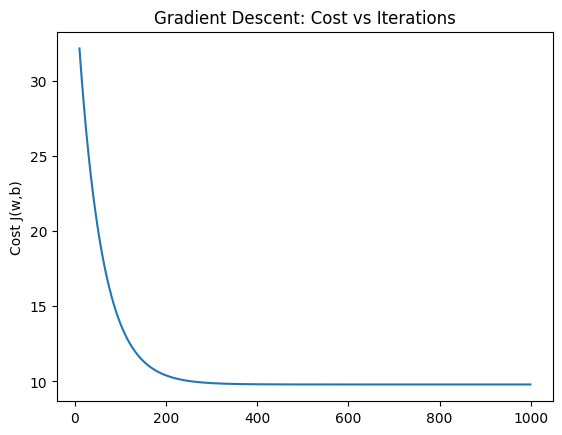

In [59]:
plt.figure()
plt.plot(it_hist[10:], cost_hist[10:])  # skip the first pointplt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

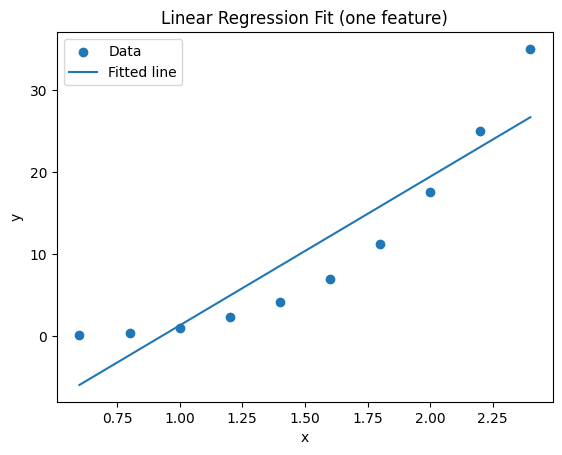

In [60]:
plt.figure()
plt.scatter(x, y, label="Data")
y_pred = predict(x, w_learned, b_learned)
plt.plot(x, y_pred, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()

VECTORIZADO

In [63]:
def compute_gradients(x, y, w, b):
    x_arr = np.array(x)
    y_arr = np.array(y)
    m = x_arr.shape[0]
    y_hat = w * x_arr + b  # f_{w,b}(x)
    errors = y_hat - y_arr


    dj_dw = (1 / m) * np.sum(errors * x_arr)
    dj_db = (1 / m) * np.sum(errors)
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(x, y, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)


Gradients at w=0, b=0: -21.523 -10.36


In [70]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x, y, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.1
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(x, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 2.1523, b= 1.0360, cost= 70.4969
Iteration  200: w=16.3146, b=-13.8270, cost= 10.3797
Iteration  400: w=17.8595, b=-16.3867, cost=  9.8082
Iteration  600: w=18.0899, b=-16.7685, cost=  9.7954
Iteration  800: w=18.1243, b=-16.8255, cost=  9.7952
Iteration 1000: w=18.1294, b=-16.8340, cost=  9.7951
Iteration 1200: w=18.1302, b=-16.8352, cost=  9.7951
Iteration 1400: w=18.1303, b=-16.8354, cost=  9.7951
Iteration 1600: w=18.1303, b=-16.8354, cost=  9.7951
Iteration 1800: w=18.1303, b=-16.8355, cost=  9.7951

Learned parameters:
w = 18.130302963272232
b = -16.835454434392684


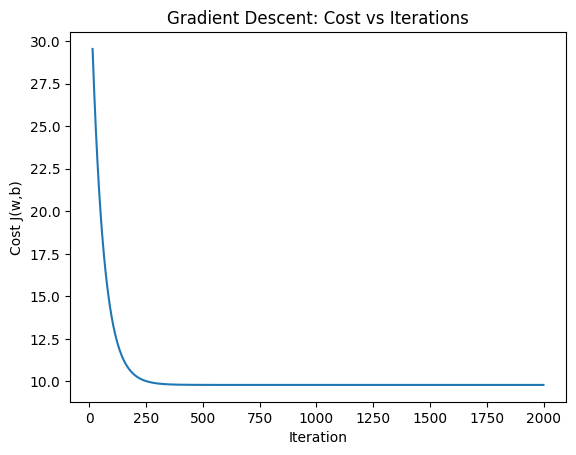

In [71]:
iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])  # skip the first points
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

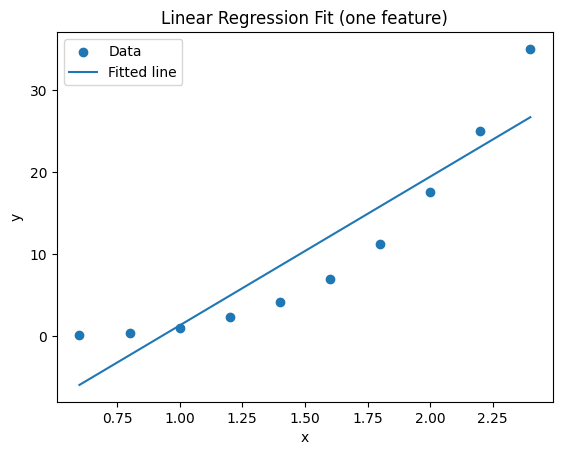

In [72]:
plt.figure()
plt.scatter(x, y, label="Data")
y_pred = predict(x, w_learned, b_learned)
plt.plot(x, y_pred, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()